<a href="https://colab.research.google.com/github/vidhu-psit/MachineLearning/blob/master/Logistic_Regression/SigmoidLogLossLogisticRegressionLambdaSelectionConfusionMetric(customer_churn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [39]:
def sigmoid(x):
  return 1/(1+np.e**-x)

In [40]:
x = np.linspace(-10, 10, 20)
x

array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ])

In [41]:
z = sigmoid(x)
z

array([4.53978687e-05, 1.30062105e-04, 3.72561113e-04, 1.06671383e-03,
       3.05025951e-03, 8.69010558e-03, 2.45015898e-02, 6.71334989e-02,
       1.70944612e-01, 3.71376581e-01, 6.28623419e-01, 8.29055388e-01,
       9.32866501e-01, 9.75498410e-01, 9.91309894e-01, 9.96949740e-01,
       9.98933286e-01, 9.99627439e-01, 9.99869938e-01, 9.99954602e-01])

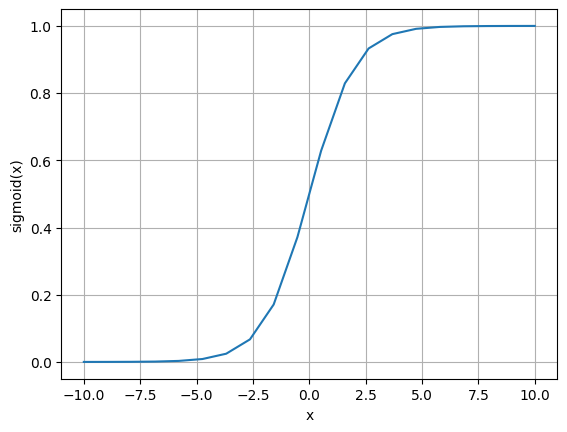

In [42]:
plt.plot(x,z)
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.grid()
plt.show()

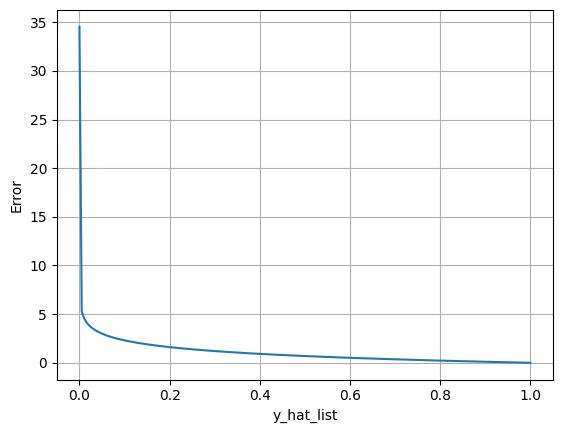

In [43]:
y = 1
z = []
y_hat_list = np.linspace(0, 1, 200)
epsilon = 1e-15 # A small value to prevent log(0)
for y_hat in y_hat_list:
  # Clip y_hat to avoid log(0) and log(1) edge cases
  clipped_y_hat = max(epsilon, min(1 - epsilon, y_hat))
  z.append((-y * math.log(clipped_y_hat)) - ((1-y)*math.log(1-clipped_y_hat)))
plt.plot(y_hat_list,z)
plt.xlabel("y_hat_list")
plt.ylabel("Error")
plt.grid()
plt.show()


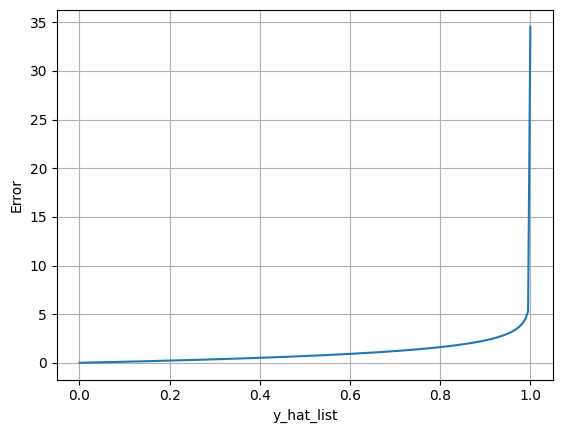

In [44]:
y = 0
z = []
epsilon = 1e-15 # A small value to prevent log(0)
y_hat_list = np.linspace(0, 1, 200)
for y_hat in y_hat_list:
  # Clip y_hat to avoid log(0) and log(1) edge cases
  clipped_y_hat = max(epsilon, min(1 - epsilon, y_hat))
  z.append((-y * math.log(clipped_y_hat)) - ((1-y)*math.log(1-clipped_y_hat)))
plt.plot(y_hat_list,z)
plt.xlabel("y_hat_list")
plt.ylabel("Error")
plt.grid()
plt.show()

#Logistic regession usecase


In [45]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 119MB/s]


In [46]:
import pandas as pd
churn_df = pd.read_csv("churn_logistic.csv")
churn_df.head(2)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.7,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.7,OH,415,371-7191,0


In [47]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  5700 non-null   int64  
 1   VMail Message   5700 non-null   int64  
 2   Day Mins        5700 non-null   float64
 3   Eve Mins        5700 non-null   float64
 4   Night Mins      5700 non-null   float64
 5   Intl Mins       5700 non-null   float64
 6   CustServ Calls  5700 non-null   int64  
 7   Intl Plan       5700 non-null   int64  
 8   VMail Plan      5700 non-null   int64  
 9   Day Calls       5700 non-null   int64  
 10  Day Charge      5700 non-null   float64
 11  Eve Calls       5700 non-null   int64  
 12  Eve Charge      5700 non-null   float64
 13  Night Calls     5700 non-null   int64  
 14  Night Charge    5700 non-null   float64
 15  Intl Calls      5700 non-null   int64  
 16  Intl Charge     5700 non-null   float64
 17  State           5700 non-null   o

In [48]:
churn_df["Intl Plan"].describe()

,Intl Plan
count,5700.000000
mean,0.176140
std,0.380973
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [49]:
for column in churn_df.columns:
  print(f"in {column} column the unique values are {churn_df[column].nunique()}\n")
  print(churn_df[column].unique())
  print("="*20)

in Account Length column the unique values are 212

[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5   9 178 181 182 217 177 210  29 180   2  17   7 212 232 192 195
 197 225 184 191 201  15 183 202   8 175   4 188 204 221]
in VMail Message column the unique values are 46

[25 26  0 24 37 27 33 39 30 41 28 34 

In [50]:
churn_df["Churn"].value_counts()

,count
Churn,
0,2850
1,2850


##Data is balanced as both the classes have same number of rows in the data

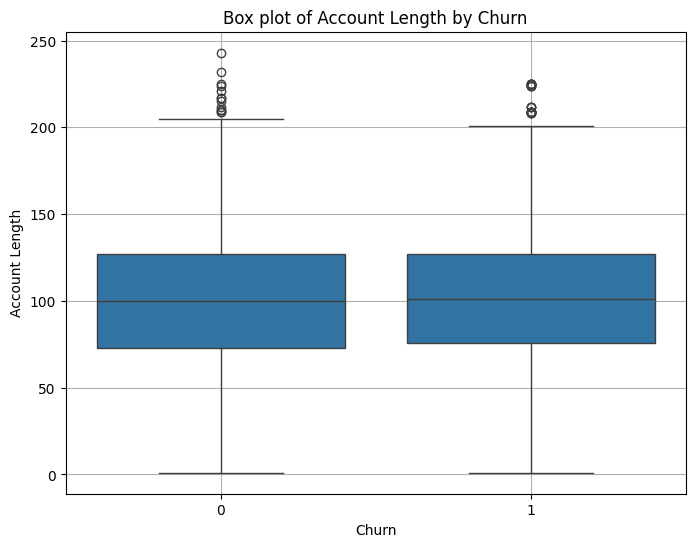

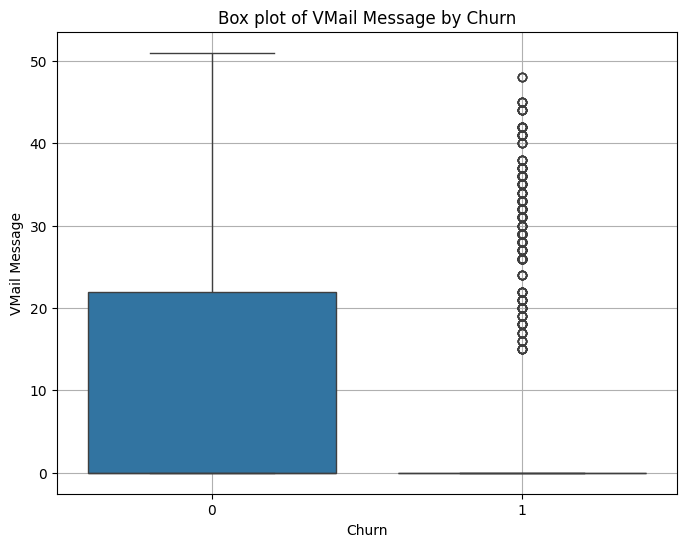

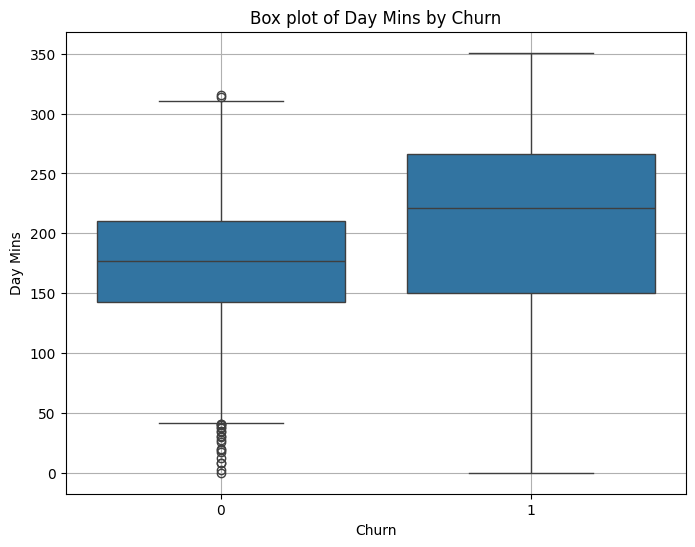

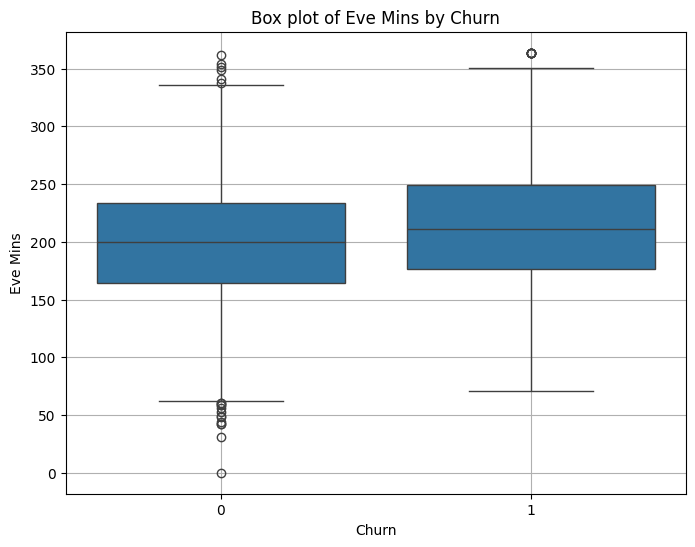

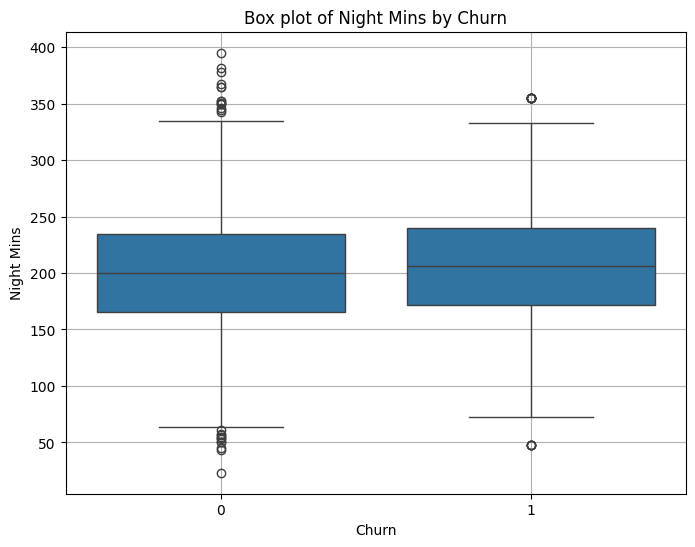

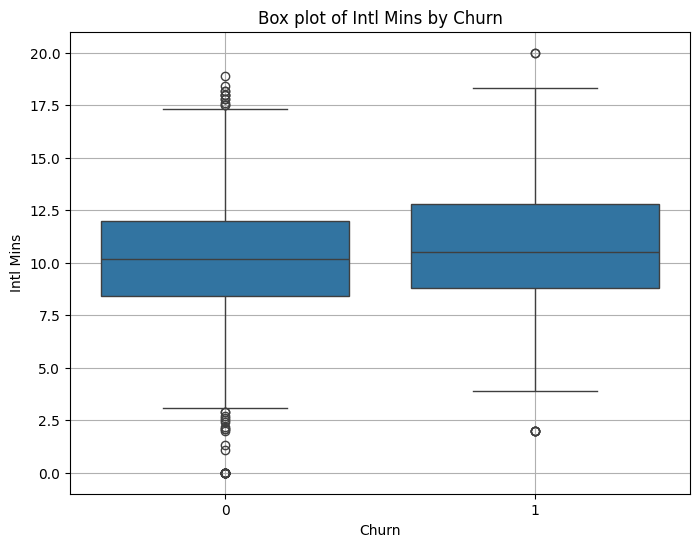

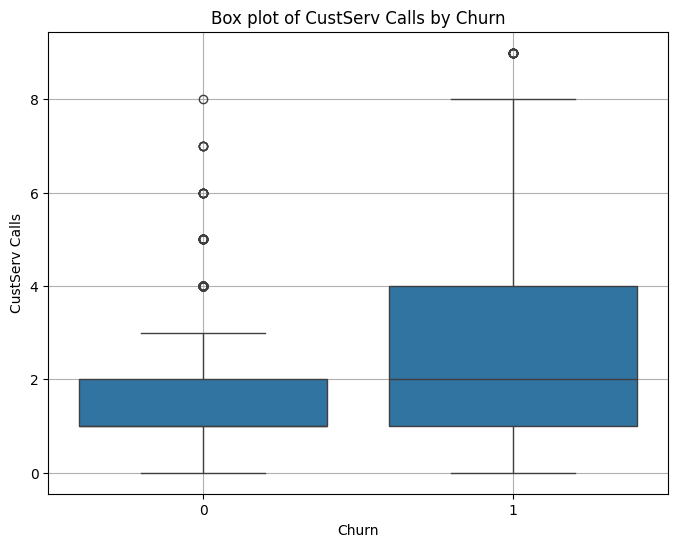

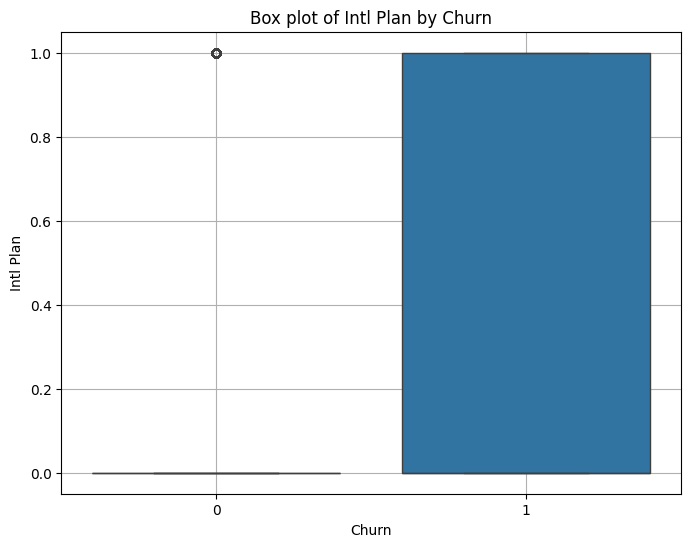

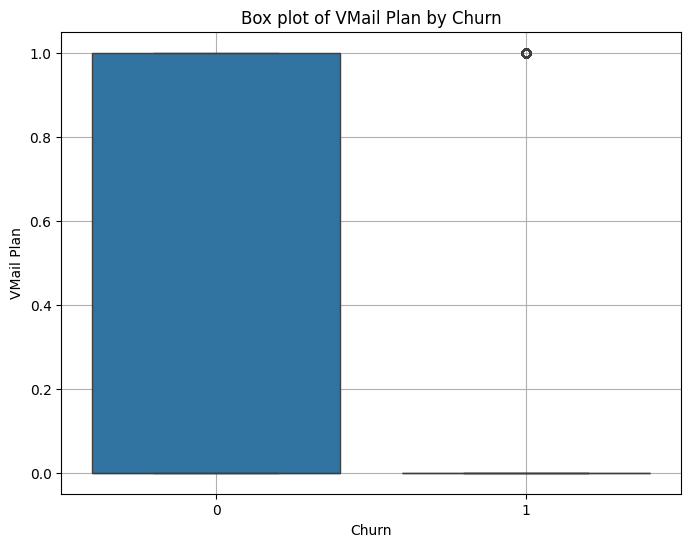

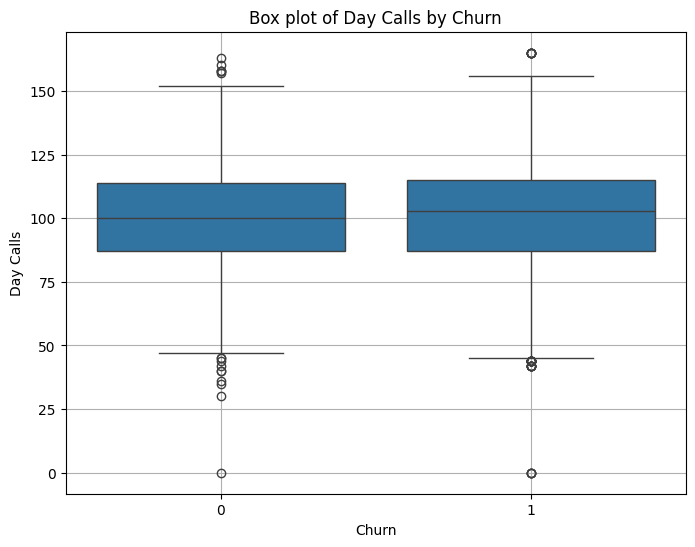

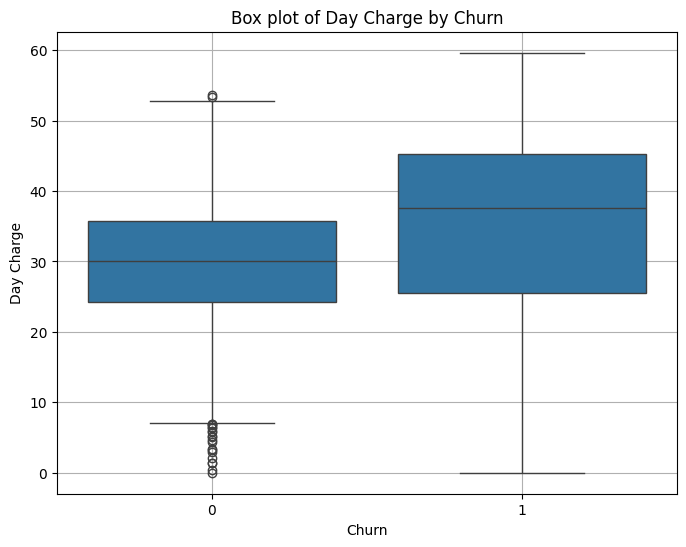

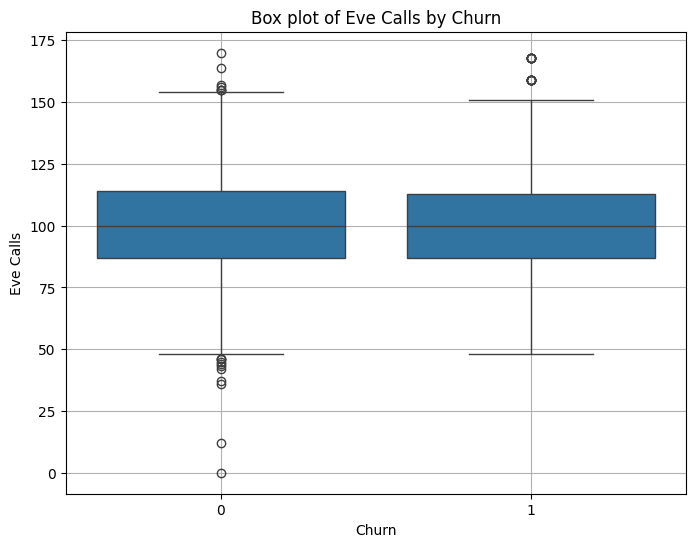

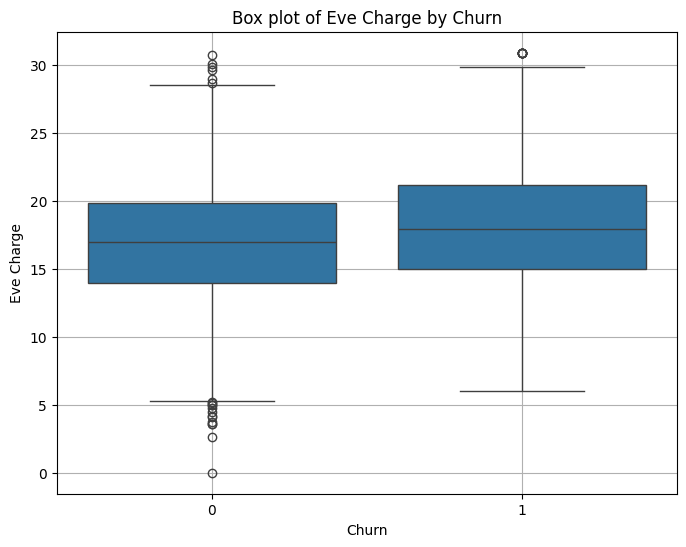

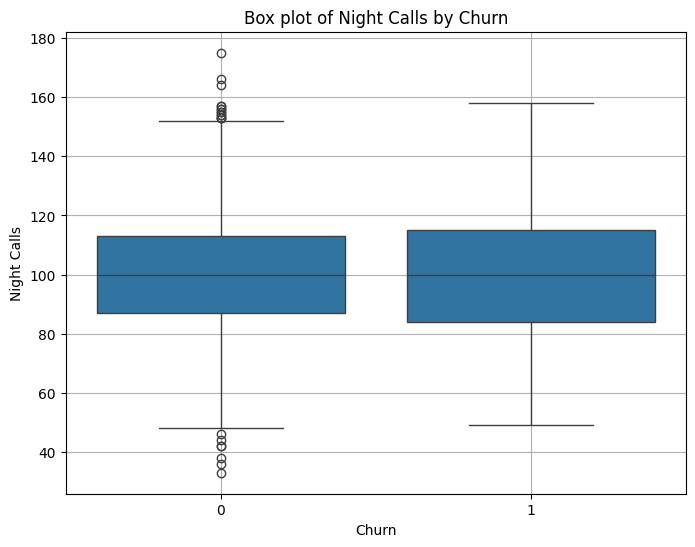

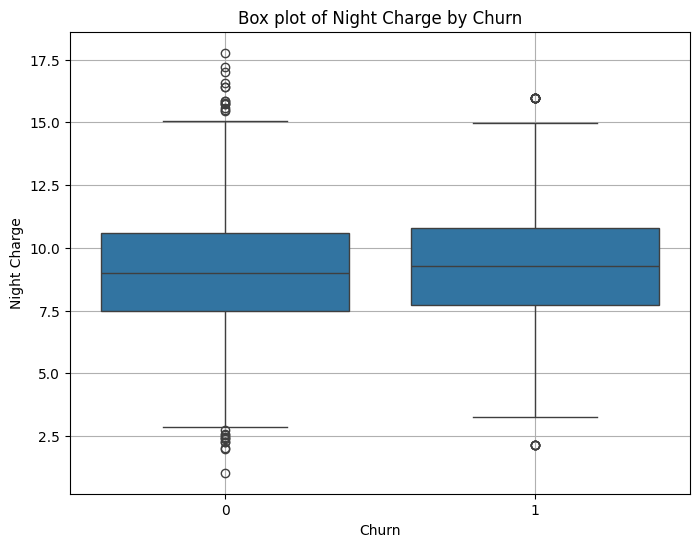

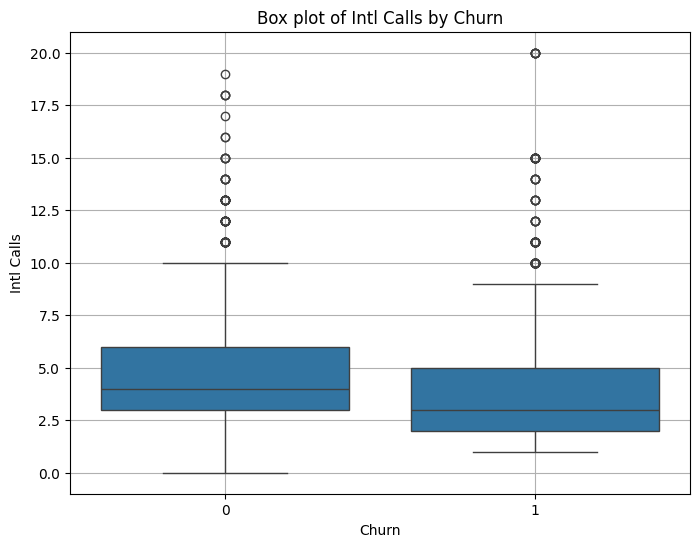

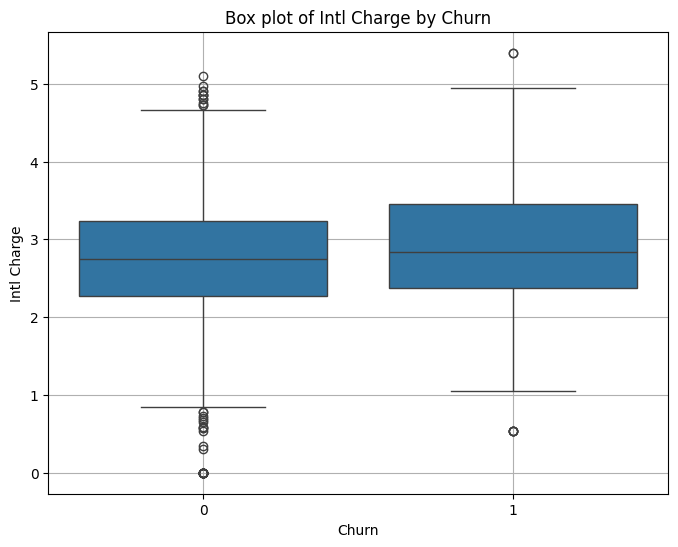

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric or high-cardinality categorical columns and the target variable itself
columns_to_plot = [col for col in churn_df.columns if col not in ['State', 'Area Code', 'Phone', 'Churn']]

for column in columns_to_plot:
  plt.figure(figsize=(8, 6)) # Create a new figure for each plot
  sns.boxplot(x='Churn', y=column, data = churn_df)
  plt.title(f'Box plot of {column} by Churn')
  plt.grid(True)
  plt.show()

##Here's what each plot reveals about customer churn:

Account Length vs. Churn: The box plots for Account Length show very similar distributions for both churned (1) and non-churned (0) customers. This suggests that the duration of the account does not seem to be a strong predictor of churn.

VMail Message vs. Churn: Customers who churn (1) tend to have fewer voicemail messages compared to those who don't churn (0). The median for churned customers is noticeably lower, indicating a potential correlation.

Day Mins vs. Churn: This is a significant indicator. Customers who churn (1) consistently show much higher Day Mins usage than those who do not churn (0). Both the median and the overall distribution for churned customers are shifted upwards, suggesting that heavy daytime usage might lead to dissatisfaction or higher costs, prompting churn.

Eve Mins vs. Churn: Similar to Day Mins, customers who churn (1) generally exhibit higher Eve Mins usage, although the difference is less pronounced than for Day Mins.

Night Mins vs. Churn: The distribution of Night Mins is quite similar for both churned and non-churned customers, indicating it might not be a strong factor in predicting churn.

Intl Mins vs. Churn: Churned customers (1) tend to have slightly higher Intl Mins compared to non-churned customers (0), but this difference is also not as strong as with Day Mins.

CustServ Calls vs. Churn: This is another very strong predictor. Customers who churn (1) have a significantly higher number of CustServ Calls. The box plot clearly shows an upward shift in the median and distribution for churned customers, with many more outliers at higher call counts, suggesting that frequent customer service interactions often precede churn.

Intl Plan vs. Churn: This is a categorical variable encoded as 0 or 1. The box plot shows that a higher proportion of customers with Intl Plan (value 1) tend to churn. The median for churned customers is higher, indicating a greater incidence of churn among those with international plans.

VMail Plan vs. Churn: Another categorical variable (0 or 1). The box plot suggests that customers without a VMail Plan (value 0) are more likely to churn than those with a plan. The median for churned customers is lower, indicating fewer VMail Plan subscriptions among them.

Day Calls vs. Churn: The number of Day Calls appears to have a very similar distribution for both churned and non-churned customers, implying it's not a strong indicator.

Eve Calls vs. Churn: Eve Calls also show similar distributions across both churn groups.

Eve Charge vs. Churn: As expected, Eve Charge mirrors Eve Mins. Churned customers tend to have slightly higher Eve Charge.

Night Calls vs. Churn: The distributions for Night Calls are very similar for both groups.

Night Charge vs. Churn: Night Charge also mirrors Night Mins, showing similar distributions for both groups.

Intl Calls vs. Churn: The number of Intl Calls shows similar distributions for both churned and non-churned customers.

Intl Charge vs. Churn: Similar to Intl Mins, churned customers show slightly higher Intl Charge.

In summary, Day Mins, CustServ Calls, Intl Plan, and VMail Message (or lack thereof) appear to be the most influential features related to customer churn based on these box plots.

##Day Min col is important as people who churned more daytime calls as compared to people whi did not churn

##Checking colinerarity of Day Mins with other columns

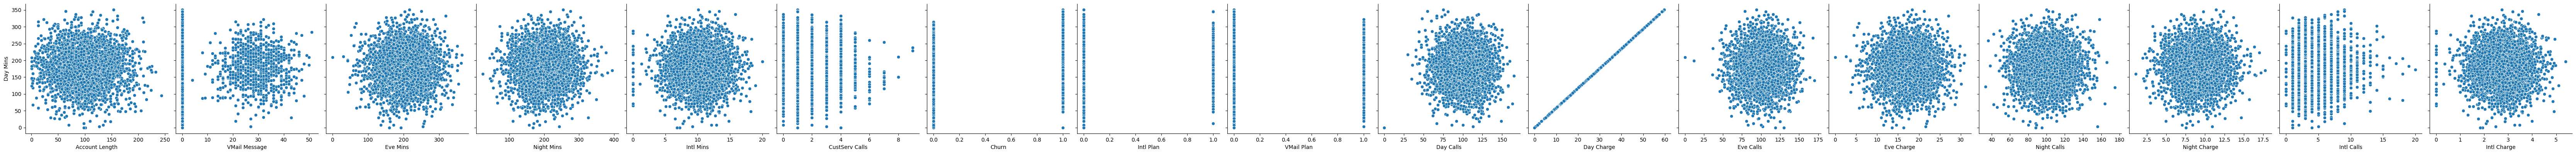

In [52]:

sns.pairplot(data=churn_df, y_vars=["Day Mins"], x_vars=['Account Length', 'VMail Message' , 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Intl Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge'], height=4, aspect=1)
plt.show()

## Day Mins is highly coliner with Day Charge col hence we can drop one of them

## Selected col for creating model

In [53]:
cols = ['Day Mins', 'Eve Mins', 'CustServ Calls', 'Intl Plan','VMail Message']
y = churn_df["Churn"]
X = churn_df[cols]
X.shape

(5700, 5)

##Train Test Split

In [54]:
from sklearn.model_selection import train_test_split
Xtrain_cv, Xtest, ytrain_cv, ytest  = train_test_split(X, y, test_size=0.2, random_state=4)
Xtrain, XVal, ytrain, yVal, = train_test_split(Xtrain_cv, ytrain_cv, test_size=0.25, random_state=4)


##Standardize the columns

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(Xtrain)
scaler.fit_transform(Xtest)
scaler.fit_transform(XVal)

array([[-0.67814027,  1.19270568, -0.5665521 , -0.47519096, -0.52275168],
       [-1.71508405,  0.68753922, -0.5665521 , -0.47519096, -0.52275168],
       [-0.09945369, -0.74210183,  0.62508885, -0.47519096, -0.52275168],
       ...,
       [-1.40697255,  0.0465968 , -1.16237258, -0.47519096,  1.31443341],
       [-1.13796149, -1.64860607, -1.16237258,  2.10441712, -0.52275168],
       [ 0.13671299, -0.92380202, -1.16237258, -0.47519096, -0.52275168]])

In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # C = 1, lambda = 1 ,  L2 regularization is done by default
model.fit(Xtrain, ytrain)

LogisticRegression()

In [57]:
model.coef_

array([[ 0.01264311,  0.00599013,  0.59129681,  2.27066729, -0.02425933]])

In [58]:
model.intercept_

array([-4.89294893])

In [59]:
y_pred=model.predict(XVal)
print(y_pred)

[0 0 1 ... 0 0 0]


In [60]:
model.predict_proba(XVal)

array([[0.70909634, 0.29090366],
       [0.86770158, 0.13229842],
       [0.45538247, 0.54461753],
       ...,
       [0.95246206, 0.04753794],
       [0.60724143, 0.39275857],
       [0.81130981, 0.18869019]])

In [61]:

print(f'Train Accuracy:{model.score(Xtrain,ytrain)}, Val Accuracy:{model.score(XVal,yVal) }' )

Train Accuracy:0.7564327485380117, Val Accuracy:0.7605263157894737


In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(yVal, y_pred)
conf_matrix



array([[422, 145],
       [128, 445]])

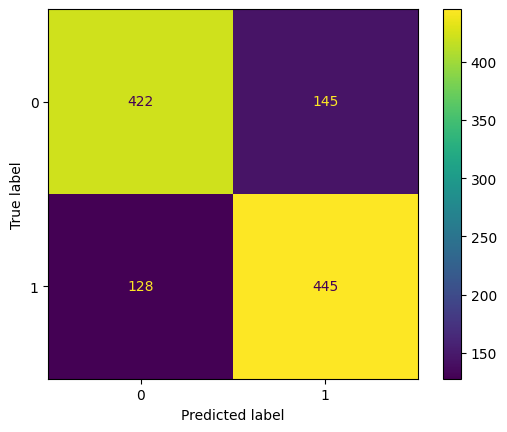

In [63]:
ConfusionMatrixDisplay(conf_matrix).plot()

##Find out best Lambda. Test Lambda values in the range of 0.01 to 12000 with 100 step size. For each lambda values in this range create logistic reg model and find the score using both test and Validation data. Then plot the train and test validation score against lambda vlaues. Choose the The best vlaidation score lambda and retrain the model and fidn the accuracy on test data

In [64]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 12000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(Xtrain, ytrain)
  train_score = scaled_lr.score(Xtrain, ytrain)
  val_score = scaled_lr.score(XVal, yVal)
  train_scores.append(train_score)
  val_scores.append(val_score)


In [65]:
best_val_index = np.argmax(val_scores)
l_best = np.arange(0.01, 12000.0, 100)[best_val_index]
print(f"The best Lambda value found is: {l_best}")
print(f"The corresponding validation accuracy is: {val_scores[best_val_index]}")

The best Lambda value found is: 2300.01
The corresponding validation accuracy is: 0.762280701754386


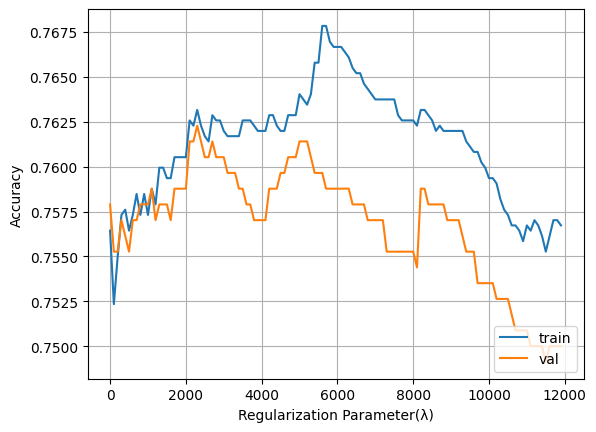

In [66]:
plt.figure()
plt.plot(list(np.arange(0.01, 12000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 12000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [67]:

scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best))
scaled_lr.fit(Xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=np.float64(0.0004347807183447028)))])

In [68]:
test_score = scaled_lr.score(Xtest,ytest)
print(test_score)

0.7684210526315789


In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred=scaled_lr.predict(XVal)
conf_matrix = confusion_matrix(yVal, y_pred)
conf_matrix


array([[417, 150],
       [121, 452]])

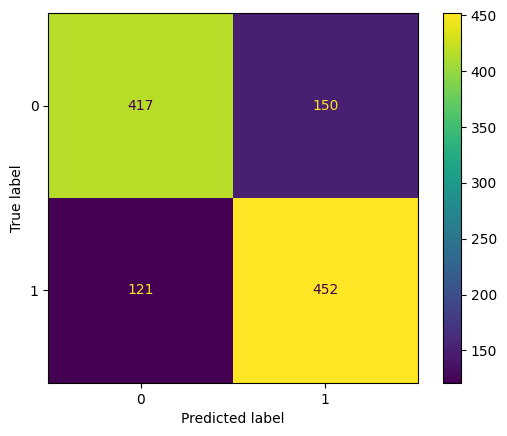

In [70]:
ConfusionMatrixDisplay(conf_matrix).plot()

Default - L2 regularisation
LogisticRegression(C= 1/la, l1_ratio = 0.5)
0 -> L2 regularisation
1 -> L1 regularisation
Elastic Reg -> 0 to 1
0.5

In [72]:
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best, l1_ratio = 0.5))
scaled_lr.fit(Xtrain, ytrain)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=np.float64(0.0004347807183447028),
                                    l1_ratio=0.5))])

In [73]:
test_score = scaled_lr.score(Xtest,ytest)
print(test_score)

0.7684210526315789


In [74]:
test_score = scaled_lr.score(Xtrain,ytrain)
print(test_score)

0.7631578947368421
